In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(1770.9811)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 48


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 698.46825  validloss 932.97366±0.00000  bestvalidloss 932.97366  last_update 0
train: iter 1  trainloss 295.45915  validloss 503.27808±0.00000  bestvalidloss 503.27808  last_update 0
train: iter 2  trainloss -48.24370  validloss 152.67186±0.00000  bestvalidloss 152.67186  last_update 0
train: iter 3  trainloss -361.76585  validloss -225.08946±0.00000  bestvalidloss -225.08946  last_update 0
train: iter 4  trainloss -552.50036  validloss -300.76335±0.00000  bestvalidloss -300.76335  last_update 0
train: iter 5  trainloss -664.82100  validloss -549.52634±0.00000  bestvalidloss -549.52634  last_update 0
train: iter 6  trainloss -744.25756  validloss -558.18338±0.00000  bestvalidloss -558.18338  last_update 0
train: iter 7  trainloss -766.86860  validloss -642.89193±0.00000  bestvalidloss -642.89193  last_update 0
train: iter 8  trainloss -937.16301  validloss -735.89196±0.00000  bestvalidloss -735.89196  last_update 0
train: iter 9  trainloss -9

train: iter 75  trainloss -1698.03044  validloss -1310.77477±0.00000  bestvalidloss -1447.09189  last_update 5
train: iter 76  trainloss -1744.26869  validloss -1324.36374±0.00000  bestvalidloss -1447.09189  last_update 6
train: iter 77  trainloss -1770.25602  validloss -1386.81379±0.00000  bestvalidloss -1447.09189  last_update 7
train: iter 78  trainloss -1806.09680  validloss -1464.66120±0.00000  bestvalidloss -1464.66120  last_update 0
train: iter 79  trainloss -1783.89291  validloss -1451.77826±0.00000  bestvalidloss -1464.66120  last_update 1
train: iter 80  trainloss -1794.92796  validloss -1393.71182±0.00000  bestvalidloss -1464.66120  last_update 2
train: iter 81  trainloss -1738.97528  validloss -1406.29045±0.00000  bestvalidloss -1464.66120  last_update 3
train: iter 82  trainloss -1724.27354  validloss -1431.62965±0.00000  bestvalidloss -1464.66120  last_update 4
train: iter 83  trainloss -1788.61292  validloss -1481.86811±0.00000  bestvalidloss -1481.86811  last_update 0
t

train: iter 150  trainloss -2028.84247  validloss -1718.82027±0.00000  bestvalidloss -1761.02538  last_update 5
train: iter 151  trainloss -1990.79065  validloss -1776.61064±0.00000  bestvalidloss -1776.61064  last_update 0
train: iter 152  trainloss -1985.47598  validloss -1670.10007±0.00000  bestvalidloss -1776.61064  last_update 1
train: iter 153  trainloss -2020.11017  validloss -1746.52203±0.00000  bestvalidloss -1776.61064  last_update 2
train: iter 154  trainloss -2041.17277  validloss -1784.45464±0.00000  bestvalidloss -1784.45464  last_update 0
train: iter 155  trainloss -2041.84691  validloss -1811.20942±0.00000  bestvalidloss -1811.20942  last_update 0
train: iter 156  trainloss -2032.22791  validloss -1737.11434±0.00000  bestvalidloss -1811.20942  last_update 1
train: iter 157  trainloss -1953.82858  validloss -1690.09762±0.00000  bestvalidloss -1811.20942  last_update 2
train: iter 158  trainloss -2006.32356  validloss -1724.58605±0.00000  bestvalidloss -1811.20942  last_u

train: iter 223  trainloss -2035.21821  validloss -1828.45809±0.00000  bestvalidloss -1911.04514  last_update 4
train: iter 224  trainloss -2051.18151  validloss -1901.72846±0.00000  bestvalidloss -1911.04514  last_update 5
train: iter 225  trainloss -2083.72003  validloss -1896.08340±0.00000  bestvalidloss -1911.04514  last_update 6
train: iter 226  trainloss -2060.05293  validloss -1909.64953±0.00000  bestvalidloss -1911.04514  last_update 7
train: iter 227  trainloss -2100.11682  validloss -1904.59500±0.00000  bestvalidloss -1911.04514  last_update 8
train: iter 228  trainloss -2070.84227  validloss -1883.39010±0.00000  bestvalidloss -1911.04514  last_update 9
train: iter 229  trainloss -2112.90304  validloss -1932.91520±0.00000  bestvalidloss -1932.91520  last_update 0
train: iter 230  trainloss -2104.41836  validloss -1926.68049±0.00000  bestvalidloss -1932.91520  last_update 1
train: iter 231  trainloss -2097.39879  validloss -1883.35758±0.00000  bestvalidloss -1932.91520  last_u

train: iter 296  trainloss -2115.92213  validloss -1947.19691±0.00000  bestvalidloss -2014.57453  last_update 5
train: iter 297  trainloss -2130.04712  validloss -1956.45712±0.00000  bestvalidloss -2014.57453  last_update 6
train: iter 298  trainloss -2098.16747  validloss -1939.33249±0.00000  bestvalidloss -2014.57453  last_update 7
train: iter 299  trainloss -2129.47803  validloss -1951.36026±0.00000  bestvalidloss -2014.57453  last_update 8
train: iter 300  trainloss -2125.87693  validloss -1975.19657±0.00000  bestvalidloss -2014.57453  last_update 9
train: iter 301  trainloss -2114.00912  validloss -2001.07090±0.00000  bestvalidloss -2014.57453  last_update 10
train: iter 302  trainloss -2089.63558  validloss -1981.90925±0.00000  bestvalidloss -2014.57453  last_update 11
train: iter 303  trainloss -2015.63007  validloss -1805.28245±0.00000  bestvalidloss -2014.57453  last_update 12
train: iter 304  trainloss -2133.44464  validloss -1974.60100±0.00000  bestvalidloss -2014.57453  las

train: iter 369  trainloss -2155.51678  validloss -2004.44093±0.00000  bestvalidloss -2036.14546  last_update 23
train: iter 370  trainloss -2141.49378  validloss -1986.27991±0.00000  bestvalidloss -2036.14546  last_update 24
train: iter 371  trainloss -2116.66404  validloss -1965.66340±0.00000  bestvalidloss -2036.14546  last_update 25
train: iter 372  trainloss -1912.09387  validloss -1885.17658±0.00000  bestvalidloss -2036.14546  last_update 26
train: iter 373  trainloss -2119.32507  validloss -1639.77020±0.00000  bestvalidloss -2036.14546  last_update 27
train: iter 374  trainloss -2155.45346  validloss -1918.37826±0.00000  bestvalidloss -2036.14546  last_update 28
train: iter 375  trainloss -2163.98235  validloss -2029.28490±0.00000  bestvalidloss -2036.14546  last_update 29
train: iter 376  trainloss -2137.30007  validloss -1947.24906±0.00000  bestvalidloss -2036.14546  last_update 30
train: iter 377  trainloss -2163.19908  validloss -2051.36594±0.00000  bestvalidloss -2051.36594

train: iter 443  trainloss -2180.86238  validloss -1996.51722±0.00000  bestvalidloss -2051.36594  last_update 66
train: iter 444  trainloss -2175.94392  validloss -2028.21055±0.00000  bestvalidloss -2051.36594  last_update 67
train: iter 445  trainloss -2163.68813  validloss -2019.05971±0.00000  bestvalidloss -2051.36594  last_update 68
train: iter 446  trainloss -1957.64098  validloss -1946.71345±0.00000  bestvalidloss -2051.36594  last_update 69
train: iter 447  trainloss -2067.72643  validloss -1797.11905±0.00000  bestvalidloss -2051.36594  last_update 70
train: iter 448  trainloss -2171.41312  validloss -1790.63798±0.00000  bestvalidloss -2051.36594  last_update 71
train: iter 449  trainloss -2183.66268  validloss -1954.59293±0.00000  bestvalidloss -2051.36594  last_update 72
train: iter 450  trainloss -2176.48023  validloss -1993.36783±0.00000  bestvalidloss -2051.36594  last_update 73
train: iter 451  trainloss -2169.78399  validloss -1978.86207±0.00000  bestvalidloss -2051.36594

train: iter 516  trainloss -2152.90415  validloss -2043.62193±0.00000  bestvalidloss -2063.19811  last_update 17
train: iter 517  trainloss -2178.81322  validloss -1912.56594±0.00000  bestvalidloss -2063.19811  last_update 18
train: iter 518  trainloss -2178.07965  validloss -2027.09016±0.00000  bestvalidloss -2063.19811  last_update 19
train: iter 519  trainloss -2173.44630  validloss -1907.36787±0.00000  bestvalidloss -2063.19811  last_update 20
train: iter 520  trainloss -2172.56776  validloss -2024.30572±0.00000  bestvalidloss -2063.19811  last_update 21
train: iter 521  trainloss -2178.02410  validloss -2033.57595±0.00000  bestvalidloss -2063.19811  last_update 22
train: iter 522  trainloss -2173.48353  validloss -2001.27027±0.00000  bestvalidloss -2063.19811  last_update 23
train: iter 523  trainloss -2148.06931  validloss -2066.87756±0.00000  bestvalidloss -2066.87756  last_update 0
train: iter 524  trainloss -2163.36427  validloss -2021.31512±0.00000  bestvalidloss -2066.87756 

train: iter 589  trainloss -2203.30565  validloss -2048.33810±0.00000  bestvalidloss -2098.14949  last_update 55
train: iter 590  trainloss -2216.21719  validloss -2075.55082±0.00000  bestvalidloss -2098.14949  last_update 56
train: iter 591  trainloss -2215.63645  validloss -2083.47082±0.00000  bestvalidloss -2098.14949  last_update 57
train: iter 592  trainloss -2215.29742  validloss -2091.73085±0.00000  bestvalidloss -2098.14949  last_update 58
train: iter 593  trainloss -2225.98594  validloss -2065.69551±0.00000  bestvalidloss -2098.14949  last_update 59
train: iter 594  trainloss -2203.86369  validloss -2065.82237±0.00000  bestvalidloss -2098.14949  last_update 60
train: iter 595  trainloss -2094.81869  validloss -2023.42131±0.00000  bestvalidloss -2098.14949  last_update 61
train: iter 596  trainloss -2186.22800  validloss -1944.92875±0.00000  bestvalidloss -2098.14949  last_update 62
train: iter 597  trainloss -2190.44896  validloss -2055.15751±0.00000  bestvalidloss -2098.14949

train: iter 662  trainloss -2155.94680  validloss -2054.59916±0.00000  bestvalidloss -2120.81570  last_update 5
train: iter 663  trainloss -2127.14018  validloss -2070.56544±0.00000  bestvalidloss -2120.81570  last_update 6
train: iter 664  trainloss -2198.95217  validloss -2018.34363±0.00000  bestvalidloss -2120.81570  last_update 7
train: iter 665  trainloss -2195.93763  validloss -2104.90625±0.00000  bestvalidloss -2120.81570  last_update 8
train: iter 666  trainloss -2109.95843  validloss -2081.02529±0.00000  bestvalidloss -2120.81570  last_update 9
train: iter 667  trainloss -2215.00397  validloss -2107.89418±0.00000  bestvalidloss -2120.81570  last_update 10
train: iter 668  trainloss -2230.80830  validloss -2085.23130±0.00000  bestvalidloss -2120.81570  last_update 11
train: iter 669  trainloss -2225.23832  validloss -2067.36177±0.00000  bestvalidloss -2120.81570  last_update 12
train: iter 670  trainloss -2234.20920  validloss -2106.64603±0.00000  bestvalidloss -2120.81570  las

train: iter 736  trainloss -2235.99224  validloss -2118.24636±0.00000  bestvalidloss -2135.61205  last_update 11
train: iter 737  trainloss -2218.54124  validloss -2109.39171±0.00000  bestvalidloss -2135.61205  last_update 12
train: iter 738  trainloss -2169.64382  validloss -2096.39609±0.00000  bestvalidloss -2135.61205  last_update 13
train: iter 739  trainloss -2213.62441  validloss -2091.05328±0.00000  bestvalidloss -2135.61205  last_update 14
train: iter 740  trainloss -2224.24676  validloss -2071.67321±0.00000  bestvalidloss -2135.61205  last_update 15
train: iter 741  trainloss -2242.26616  validloss -2117.31102±0.00000  bestvalidloss -2135.61205  last_update 16
train: iter 742  trainloss -2237.17677  validloss -2109.54578±0.00000  bestvalidloss -2135.61205  last_update 17
train: iter 743  trainloss -2248.41061  validloss -2129.73156±0.00000  bestvalidloss -2135.61205  last_update 18
train: iter 744  trainloss -2228.78844  validloss -2124.46983±0.00000  bestvalidloss -2135.61205

train: iter 809  trainloss -2213.79493  validloss -2101.33026±0.00000  bestvalidloss -2148.95096  last_update 48
train: iter 810  trainloss -2246.84146  validloss -2059.70002±0.00000  bestvalidloss -2148.95096  last_update 49
train: iter 811  trainloss -2214.74976  validloss -2085.34823±0.00000  bestvalidloss -2148.95096  last_update 50
train: iter 812  trainloss -2268.11512  validloss -2105.52733±0.00000  bestvalidloss -2148.95096  last_update 51
train: iter 813  trainloss -2251.97872  validloss -2111.45875±0.00000  bestvalidloss -2148.95096  last_update 52
train: iter 814  trainloss -2233.55919  validloss -2117.05193±0.00000  bestvalidloss -2148.95096  last_update 53
train: iter 815  trainloss -2233.29473  validloss -2025.70046±0.00000  bestvalidloss -2148.95096  last_update 54
train: iter 816  trainloss -2257.97431  validloss -2108.67277±0.00000  bestvalidloss -2148.95096  last_update 55
train: iter 817  trainloss -2220.28141  validloss -2093.48091±0.00000  bestvalidloss -2148.95096

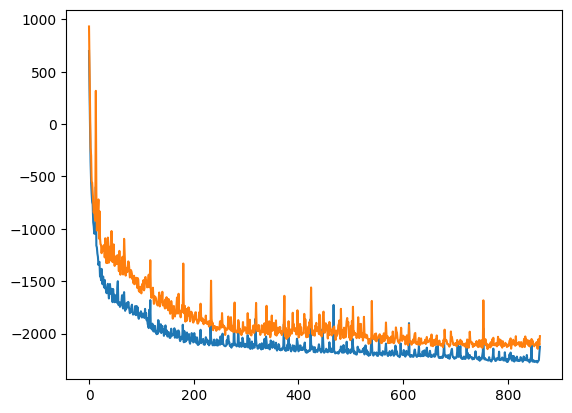

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 4.91532  validloss 5.09031±0.00000  bestvalidloss 5.09031  last_update 0
train: iter 1  trainloss 4.53139  validloss 4.68259±0.00000  bestvalidloss 4.68259  last_update 0
train: iter 2  trainloss 4.20627  validloss 4.32994±0.00000  bestvalidloss 4.32994  last_update 0
train: iter 3  trainloss 3.92780  validloss 4.01329±0.00000  bestvalidloss 4.01329  last_update 0
train: iter 4  trainloss 3.67680  validloss 3.76236±0.00000  bestvalidloss 3.76236  last_update 0
train: iter 5  trainloss 3.45268  validloss 3.52459±0.00000  bestvalidloss 3.52459  last_update 0
train: iter 6  trainloss 3.25671  validloss 3.33858±0.00000  bestvalidloss 3.33858  last_update 0
train: iter 7  trainloss 3.06866  validloss 3.12936±0.00000  bestvalidloss 3.12936  last_update 0
train: iter 8  trainloss 2.90011  validloss 2.94008±0.00000  bestvalidloss 2.94008  last_update 0
train: iter 9  trainloss 2.74219  validloss 2.78395±0.00000  bestvalidloss 2.78395  last_update 0
train: iter 10  trai

train: iter 94  trainloss -1.47987  validloss -1.90433±0.00000  bestvalidloss -1.90433  last_update 0
train: iter 95  trainloss -1.50402  validloss -1.90635±0.00000  bestvalidloss -1.90635  last_update 0
train: iter 96  trainloss -1.51270  validloss -1.85656±0.00000  bestvalidloss -1.90635  last_update 1
train: iter 97  trainloss -1.53737  validloss -1.94487±0.00000  bestvalidloss -1.94487  last_update 0
train: iter 98  trainloss -1.53765  validloss -1.93978±0.00000  bestvalidloss -1.94487  last_update 1
train: iter 99  trainloss -1.57184  validloss -1.92462±0.00000  bestvalidloss -1.94487  last_update 2
train: iter 100  trainloss -1.56029  validloss -1.99579±0.00000  bestvalidloss -1.99579  last_update 0
train: iter 101  trainloss -1.59778  validloss -2.00026±0.00000  bestvalidloss -2.00026  last_update 0
train: iter 102  trainloss -1.58438  validloss -1.95986±0.00000  bestvalidloss -2.00026  last_update 1
train: iter 103  trainloss -1.57100  validloss -1.97085±0.00000  bestvalidloss 

train: iter 177  trainloss -1.57015  validloss -2.07935±0.00000  bestvalidloss -2.15520  last_update 15
train: iter 178  trainloss -1.57887  validloss -2.09160±0.00000  bestvalidloss -2.15520  last_update 16
train: iter 179  trainloss -1.54685  validloss -2.10355±0.00000  bestvalidloss -2.15520  last_update 17
train: iter 180  trainloss -1.60957  validloss -2.06987±0.00000  bestvalidloss -2.15520  last_update 18
train: iter 181  trainloss -1.56411  validloss -2.11834±0.00000  bestvalidloss -2.15520  last_update 19
train: iter 182  trainloss -1.56057  validloss -2.08133±0.00000  bestvalidloss -2.15520  last_update 20
train: iter 183  trainloss -1.58449  validloss -2.10412±0.00000  bestvalidloss -2.15520  last_update 21
train: iter 184  trainloss -1.56535  validloss -2.10136±0.00000  bestvalidloss -2.15520  last_update 22
train: iter 185  trainloss -1.56163  validloss -2.11408±0.00000  bestvalidloss -2.15520  last_update 23
train: iter 186  trainloss -1.65247  validloss -2.07721±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-0.9801, -2.3627, -3.7935, -5.0436], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 118.78485  validloss 118.78117±0.00000  bestvalidloss 118.78117  last_update 0
train: iter 1  trainloss 88.86262  validloss 95.03108±0.00000  bestvalidloss 95.03108  last_update 0
train: iter 2  trainloss 66.13117  validloss 67.36862±0.00000  bestvalidloss 67.36862  last_update 0
train: iter 3  trainloss 52.71120  validloss 51.72132±0.00000  bestvalidloss 51.72132  last_update 0
train: iter 4  trainloss 42.33957  validloss 40.98774±0.00000  bestvalidloss 40.98774  last_update 0
train: iter 5  trainloss 33.76975  validloss 32.82085±0.00000  bestvalidloss 32.82085  last_update 0
train: iter 6  trainloss 26.88930  validloss 25.55366±0.00000  bestvalidloss 25.55366  last_update 0
train: iter 7  trainloss 21.51798  validloss 20.69515±0.00000  bestvalidloss 20.69515  last_update 0
train: iter 8  trainloss 17.24816  validloss 16.50000±0.00000  bestvalidloss 16.50000  last_update 0
train: iter 9  trainloss 13.69832  validloss 12.96482±0.00000  bestvalidloss 12.96482  l

train: iter 84  trainloss 1.20860  validloss 3.59824±0.00000  bestvalidloss 3.36441  last_update 24
train: iter 85  trainloss 1.21268  validloss 3.68300±0.00000  bestvalidloss 3.36441  last_update 25
train: iter 86  trainloss 1.20820  validloss 3.57515±0.00000  bestvalidloss 3.36441  last_update 26
train: iter 87  trainloss 1.19269  validloss 3.72783±0.00000  bestvalidloss 3.36441  last_update 27
train: iter 88  trainloss 1.21494  validloss 3.87455±0.00000  bestvalidloss 3.36441  last_update 28
train: iter 89  trainloss 1.20347  validloss 3.37695±0.00000  bestvalidloss 3.36441  last_update 29
train: iter 90  trainloss 1.17408  validloss 3.54998±0.00000  bestvalidloss 3.36441  last_update 30
train: iter 91  trainloss 1.21167  validloss 3.49677±0.00000  bestvalidloss 3.36441  last_update 31
train: iter 92  trainloss 1.15090  validloss 3.51403±0.00000  bestvalidloss 3.36441  last_update 32
train: iter 93  trainloss 1.18244  validloss 3.32126±0.00000  bestvalidloss 3.32126  last_update 0
t

train: iter 167  trainloss 1.10750  validloss 3.73249±0.00000  bestvalidloss 3.14066  last_update 9
train: iter 168  trainloss 1.13000  validloss 3.53908±0.00000  bestvalidloss 3.14066  last_update 10
train: iter 169  trainloss 1.11825  validloss 3.52442±0.00000  bestvalidloss 3.14066  last_update 11
train: iter 170  trainloss 1.12571  validloss 3.36252±0.00000  bestvalidloss 3.14066  last_update 12
train: iter 171  trainloss 1.10214  validloss 3.45380±0.00000  bestvalidloss 3.14066  last_update 13
train: iter 172  trainloss 1.11911  validloss 3.32041±0.00000  bestvalidloss 3.14066  last_update 14
train: iter 173  trainloss 1.12406  validloss 3.50972±0.00000  bestvalidloss 3.14066  last_update 15
train: iter 174  trainloss 1.10059  validloss 3.42684±0.00000  bestvalidloss 3.14066  last_update 16
train: iter 175  trainloss 1.10756  validloss 3.50505±0.00000  bestvalidloss 3.14066  last_update 17
train: iter 176  trainloss 1.12176  validloss 3.39526±0.00000  bestvalidloss 3.14066  last_u

train: iter 249  trainloss 1.10532  validloss 3.29264±0.00000  bestvalidloss 3.14066  last_update 91
train: iter 250  trainloss 1.05702  validloss 3.52045±0.00000  bestvalidloss 3.14066  last_update 92
train: iter 251  trainloss 1.08060  validloss 3.66802±0.00000  bestvalidloss 3.14066  last_update 93
train: iter 252  trainloss 1.09175  validloss 3.29927±0.00000  bestvalidloss 3.14066  last_update 94
train: iter 253  trainloss 1.13414  validloss 3.37113±0.00000  bestvalidloss 3.14066  last_update 95
train: iter 254  trainloss 1.12476  validloss 3.37157±0.00000  bestvalidloss 3.14066  last_update 96
train: iter 255  trainloss 1.10765  validloss 3.33453±0.00000  bestvalidloss 3.14066  last_update 97
train: iter 256  trainloss 1.08338  validloss 3.72254±0.00000  bestvalidloss 3.14066  last_update 98
train: iter 257  trainloss 1.07783  validloss 3.43563±0.00000  bestvalidloss 3.14066  last_update 99
train: iter 258  trainloss 1.08007  validloss 3.85338±0.00000  bestvalidloss 3.14066  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-12.1799)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(3.3692)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.6745290708725278
tensor([1.3300])
